# El Proceso de Análisis de Datos en Jupyter Notebook

## 1. Definición del Problema
- Establece objetivos claros y medibles
- Forma un equipo interdisciplinario
- Documenta las preguntas clave a responder

Ejemplo:

Objetivo: Analizar el crecimiento de una piblación de moluscos x que habita el fordo Puyuhuapi
Preguntas clave:

1. ¿Cuál es la tendencia de crecimiento en 12 meses?

2. ¿cuál es la edad de mayor frecuencia ?

3. ¿Existe alguna estacionalidad en su reproddución?

## 2. Lectura de datos Datos
- Identifica y accede a fuentes de datos relevantes
- Utiliza APIs, bases de datos o archivos según sea necesario
- Considera Web Scraping para datos web no estructurados

### 2.1 Ejemplo:

#### a) Importamos Librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### b) Leer datos 

In [2]:
# Cargar datos del archivo CSV previamnete generados
oceano_df = pd.read_csv('./datos/temperatura_oceano.csv')

#### c) Agregamos errores a los datos (paso no necesario)

Esto únicamente se realiza para que los datos generados previamente contengan agunos errores que nos permita aplicar técnicas de filtrado.

In [2]:
# Agregamos errores en los datos para que sean mas realistas 

def add_errors_to_ocean_data(df, error_rate=0.1):
    # Crear una copia del DataFrame original
    df_with_errors = df.copy()
    
    # Calcular el número de errores a introducir
    num_errors = int(len(df) * error_rate)
    
    # Introducir valores nulos
    for column in df.columns:
        if column != 'fecha':  # No modificamos la columna de fecha
            null_indices = np.random.choice(df.index, size=num_errors, replace=False)
            df_with_errors.loc[null_indices, column] = np.nan
    
    # Introducir valores erróneos
    for column in ['profundidad', 'temperatura', 'salinidad', 'oxigeno_disuelto']:
        error_indices = np.random.choice(df.index, size=num_errors, replace=False)
        
        if column == 'profundidad':
            df_with_errors.loc[error_indices, column] *= np.random.uniform(0.5, 2, size=num_errors)
        elif column == 'temperatura':
            df_with_errors.loc[error_indices, column] += np.random.uniform(-10, 10, size=num_errors)
        elif column == 'salinidad':
            df_with_errors.loc[error_indices, column] *= np.random.uniform(0.8, 1.2, size=num_errors)
        elif column == 'oxigeno_disuelto':
            df_with_errors.loc[error_indices, column] *= np.random.uniform(0.5, 1.5, size=num_errors)
    
    # Introducir algunos valores extremadamente atípicos
    outlier_indices = np.random.choice(df.index, size=int(num_errors/10), replace=False)
    df_with_errors.loc[outlier_indices, 'temperatura'] = np.random.uniform(40, 50, size=len(outlier_indices))
    
    return df_with_errors

# Usar la función para agregar errores
oceano_df_with_errors = add_errors_to_ocean_data(oceano_df)

# Mostrar las primeras filas del nuevo DataFrame
print("Primeras filas del conjunto de datos con errores:")
print(oceano_df_with_errors.head(10))

# Guardar el nuevo DataFrame con errores
oceano_df_with_errors.to_csv('./datos/temperatura_oceano_con_errores.csv', index=False)


# Cargar datos del archivo CSV
oceano_df = pd.read_csv('./datos/temperatura_oceano_con_errores.csv')

Primeras filas del conjunto de datos con errores:
        fecha  profundidad  temperatura  salinidad  oxigeno_disuelto
0  2023-01-01   164.265798    29.701311  35.199887          4.649985
1  2023-01-01   176.528032    23.048905  35.241471               NaN
2  2023-01-01   374.540119    22.273810  35.389784          4.087915
3  2023-01-01   386.102638    24.407527  35.439212          3.784329
4  2023-01-01   393.864406          NaN  35.470789               NaN
5  2023-01-02   220.486209    22.447322  35.278664          4.580114
6  2023-01-02   651.232977    18.608800  35.663874          2.523272
7  2023-01-02   814.574720    20.383745  35.673345               NaN
8  2023-01-02   950.714306    18.839653  36.068938          1.505255
9  2023-01-02   961.190564    20.526080  36.123440          1.020548


### 2.1 Nota Para GoogleColab

Si el archivo .csv está en tu Google Drive:

   - **Monta tu Google Drive:** Ejecuta el siguiente código en una celda de tu notebook:

``` Python 
from google.colab import drive
   drive.mount('/content/drive')
```

Se te pedirá que autorices a Colab a acceder a tu Google Drive.

   - **Navega por tu Drive:** Usa el panel de archivos a la izquierda de la pantalla para navegar por tu Google Drive hasta encontrar el archivo CSV.
   - **Copia la ruta:** Haz clic derecho en el archivo CSV y selecciona "Copiar ruta". La ruta se copiará a tu portapapeles.
   - **Pega la ruta en tu código:** Reemplaza '/content/drive/MyDrive/ruta/a/tu/archivo.csv' en el código anterior con la ruta que copiaste.



## 3. Preparación de Datos
- Limpia datos: maneja valores nulos, elimina duplicados
- Normaliza y estandariza datos según sea necesario
- Transforma datos al formato adecuado para el análisis

Ejemplo:

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

print("\nInformación del DataFrame antes de la preparación:")
print(oceano_df.info())


Información del DataFrame antes de la preparación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha             1825 non-null   object 
 1   profundidad       1643 non-null   float64
 2   temperatura       1643 non-null   float64
 3   salinidad         1643 non-null   float64
 4   oxigeno_disuelto  1643 non-null   float64
dtypes: float64(4), object(1)
memory usage: 71.4+ KB
None


### 3.1. Limpieza de datos nulos

In [3]:
# 1. Limpieza de datos
# Manejar valores nulos
print("\nValores nulos antes de la limpieza:")
print(oceano_df.isnull().sum())
oceano_df= oceano_df.dropna()
print("\nValores nulos después de la limpieza:")
print(oceano_df.isnull().sum())


Valores nulos antes de la limpieza:
fecha                 0
profundidad         182
temperatura         180
salinidad           182
oxigeno_disuelto    182
dtype: int64

Valores nulos después de la limpieza:
fecha               0
profundidad         0
temperatura         0
salinidad           0
oxigeno_disuelto    0
dtype: int64


## 4. Exploración/Visualización
- Analiza estadísticas descriptivas
- Crea visualizaciones para identificar patrones y relaciones
- Utiliza gráficos como histogramas, diagramas de dispersión, etc.

Ejemplo:

       profundidad  temperatura    salinidad  oxigeno_disuelto
count  1149.000000  1149.000000  1149.000000       1149.000000
mean    500.940725    21.797027    35.437995          3.367003
std     311.149402     2.659227     1.349672          1.349567
min       4.632023    13.551626    28.373632          0.649554
25%     233.712082    20.010702    35.202325          2.252934
50%     495.146527    21.820817    35.479223          3.356694
75%     747.609380    23.597453    35.761812          4.512831
max    1764.474464    29.713756    42.587239          7.719343


<Figure size 1200x600 with 0 Axes>

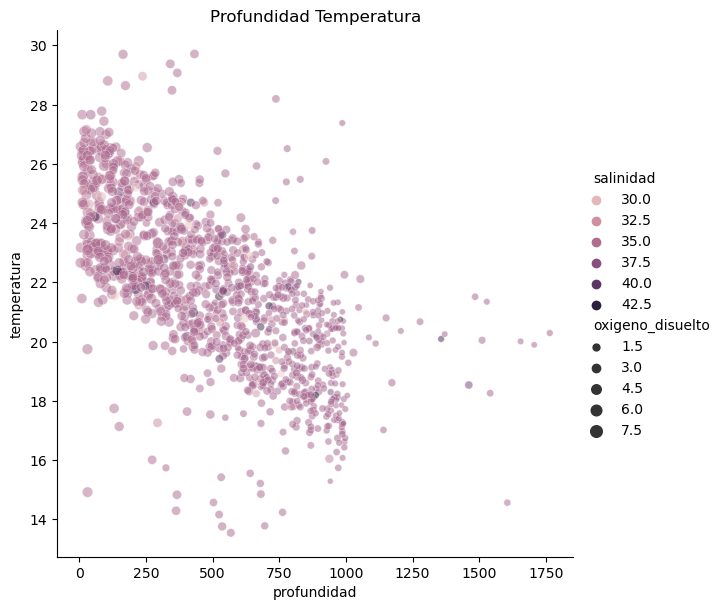

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticas descriptivas
print(oceano_df.describe())

# Gráfico de ventas mensuales
plt.figure(figsize=(12,6))

#  hue="origin", size="weight", sizes=(40, 400), alpha=.5, palette="muted", height=6, data=mpg
sns.relplot(x='profundidad', y='temperatura', hue="salinidad", size="oxigeno_disuelto", alpha=.5, height=6, data=oceano_df)
plt.title('Profundidad Temperatura')
plt.show()

## 5. Filtrado de datos anomalos

### 5.1. Filtrar por rango de profundidad

In [12]:

prof_filtrado = oceano_df[(oceano_df['profundidad'] >= 0) & (oceano_df['profundidad'] <= 1000)]
print("Datos filtrados por profundidad entre 0 y 1000:")
print(prof_filtrado.head())

Datos filtrados por profundidad entre 0 y 1000:
       fecha  profundidad  temperatura  salinidad  oxigeno_disuelto
0 2023-01-01   164.265798    29.701311  35.199887          4.649985
2 2023-01-01   374.540119    22.273810  35.389784          4.087915
3 2023-01-01   386.102638    24.407527  35.439212          3.784329
5 2023-01-02   220.486209    22.447322  35.278664          4.580114
6 2023-01-02   651.232977    18.608800  35.663874          2.523272


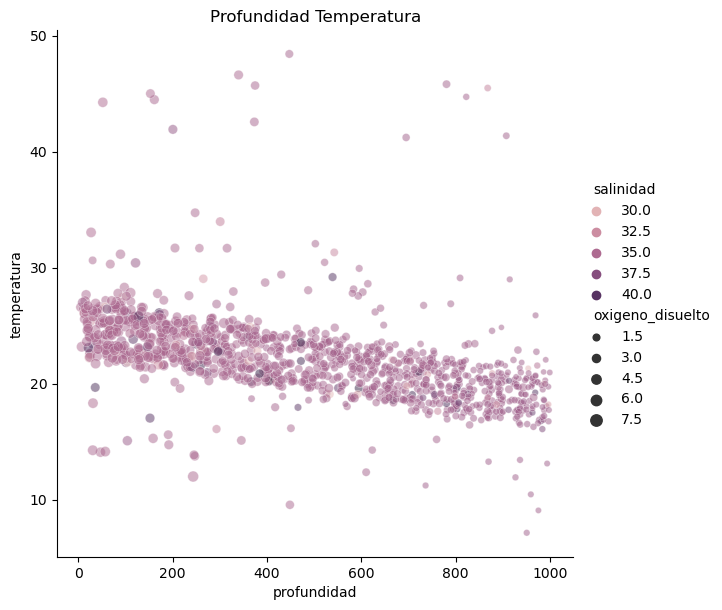

In [34]:
#  hue="origin", size="weight", sizes=(40, 400), alpha=.5, palette="muted", height=6, data=mpg
sns.relplot(x='profundidad', y='temperatura', hue="salinidad", size="oxigeno_disuelto", alpha=.5, height=6, data=prof_filtrado)
plt.title('Profundidad Temperatura')
plt.show()

In [13]:
oceano_df = prof_filtrado

### 5.2. Filtrar valores atípicos de temperatura (usando el rango intercuartílico)

In [14]:

Q1 = oceano_df['temperatura'].quantile(0.25)
Q3 = oceano_df['temperatura'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.7 * IQR
upper_bound = Q3 + 1.7 * IQR
temperatura_filtrado = oceano_df[(oceano_df['temperatura'] >= lower_bound) & (oceano_df['temperatura'] <= upper_bound)]
print("\nDatos con temperatura dentro del rango normal:")
print(temperatura_filtrado.head())


Datos con temperatura dentro del rango normal:
       fecha  profundidad  temperatura  salinidad  oxigeno_disuelto
0 2023-01-01   164.265798    29.701311  35.199887          4.649985
2 2023-01-01   374.540119    22.273810  35.389784          4.087915
3 2023-01-01   386.102638    24.407527  35.439212          3.784329
5 2023-01-02   220.486209    22.447322  35.278664          4.580114
6 2023-01-02   651.232977    18.608800  35.663874          2.523272


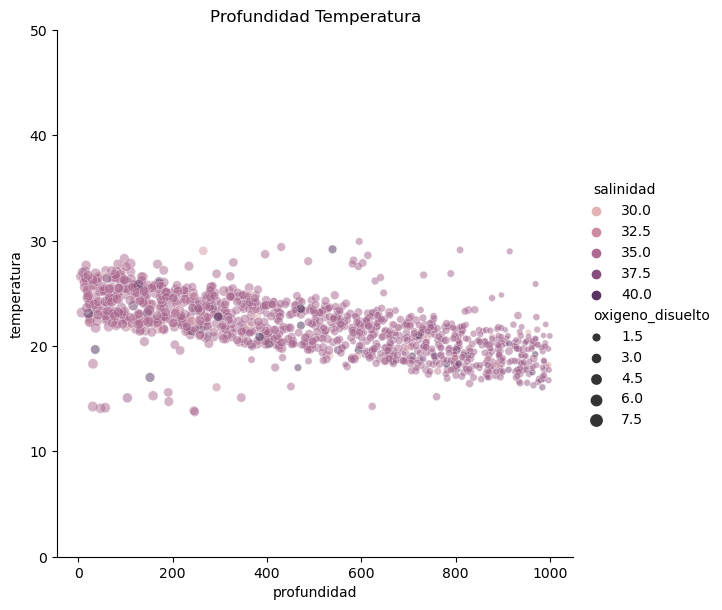

In [60]:
#  hue="origin", size="weight", sizes=(40, 400), alpha=.5, palette="muted", height=6, data=mpg
sns.relplot(x='profundidad', y='temperatura', hue="salinidad", size="oxigeno_disuelto", alpha=.5, height=6, data=temperatura_filtrado)
plt.ylim(0, 50)  # Ajusta estos valores según tus datos
plt.title('Profundidad Temperatura')
plt.show()

In [15]:
oceano_df = temperatura_filtrado

### 5.3. Filtrar por fecha

#### a) periodo completo de datos 

/tmp/ipykernel_6463/1974440032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oceano_df['fecha']     = pd.to_datetime(oceano_df['fecha'])


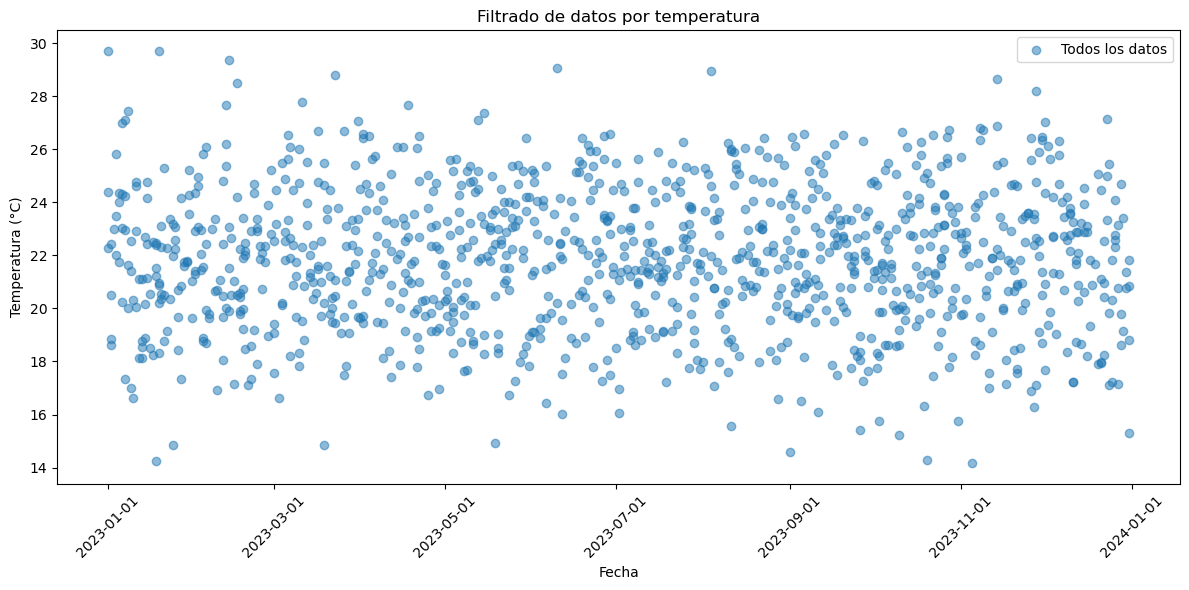

In [16]:
import matplotlib.dates as mdates
# veamos el periodo completo de datos 

# Convertir 'fecha' a datetime si aún no lo está
oceano_df['fecha']     = pd.to_datetime(oceano_df['fecha'])


# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los datos

ax.scatter(oceano_df['fecha'], oceano_df['temperatura'], alpha=0.5, label='Todos los datos')

# Configurar el formato de las fechas en el eje x
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.title('Filtrado de datos por temperatura')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### b) Filtrar por fecha

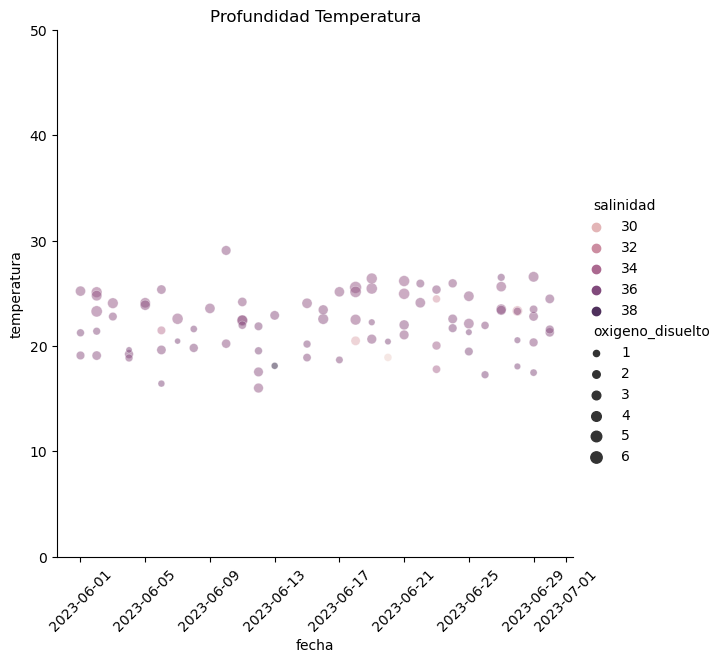

In [17]:

# filtrado para un periodo de tiempo
fecha_filtrado = oceano_df[oceano_df['fecha'].between('2023-06-01', '2023-06-30')]


#  hue="origin", size="weight", sizes=(40, 400), alpha=.5, palette="muted", height=6, data=mpg
sns.relplot(x='fecha', y='temperatura', hue="salinidad", size="oxigeno_disuelto", alpha=.5, height=6, data=fecha_filtrado)
plt.ylim(0, 50)  # Ajusta estos valores según tus datos
plt.xticks(rotation=45)
plt.title('Profundidad Temperatura')
plt.show()


### 5.4 Combinar múltiples condiciones

In [72]:
# 6. Combinar múltiples condiciones
combinado_filtrado = oceano_df[
    (oceano_df['profundidad'] > 100) & 
    (oceano_df['temperatura'] > 20) & 
    (oceano_df['oxigeno_disuelto'] > 4)
]
print("\nDatos que cumplen múltiples condiciones:")
print(combinado_filtrado.head())



Datos que cumplen múltiples condiciones:
        fecha  profundidad  temperatura  salinidad  oxigeno_disuelto
1  2023-01-01   176.528032    23.048905  35.241471          4.457954
2  2023-01-01   597.772797    22.273810  35.389784          4.925597
5  2023-01-02   220.486209    22.447322  35.278664          4.580114
10 2023-01-03   148.728921    23.004851  34.988832          4.515654
65 2023-01-14   212.339111    22.714697  35.136320          4.341678


## 6. Modelado Predictivo
- Selecciona el tipo de modelo apropiado (clasificación, regresión, clustering)
- Prepara los datos para el modelado (división en conjuntos de entrenamiento y prueba)
- Entrena y ajusta el modelo

Ejemplo (Regresión Lineal):

### 6.2 Regresión Lineal, Entrenamiento y Errores

#### a) Modelo de Regresión Lineal

La regresión lineal es un modelo estadístico que busca establecer una relación lineal entre una variable dependiente (y) y una o más variables independientes (x). En este caso:

- Variable independiente (x): profundidad
- Variable dependiente (y): temperatura

La ecuación general es: $y = m\ x + b$, donde:
- $m$ es la pendiente
- $b$ es la intersección con el eje y

El modelo intenta encontrar los valores de m y b que mejor se ajusten a los datos.

#### b) Proceso de Entrenamiento

1. **Preparación de datos:**
   ```python
   x = oceano_df[['profundidad']]
   y = oceano_df['temperatura']
   ```
   Seleccionamos 'profundidad' como variable independiente y 'temperatura' como variable dependiente.

2. **División de datos:**
   ```python
   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
   ```
   - Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%).
   - `random_state=42` asegura reproducibilidad.

3. **Entrenamiento del modelo:**
   ```python
   model = LinearRegression()
   model.fit(x_train, y_train)
   ```
   - Creamos una instancia del modelo de regresión lineal.
   - `fit()` ajusta el modelo a los datos de entrenamiento, calculando m y b.

4. **Predicción:**
   ```python
   y_pred = model.predict(x_test)
   ```
   Usamos el modelo entrenado para predecir temperaturas basadas en las profundidades del conjunto de prueba.

#### c) Evaluación del Modelo y Errores

1. **Error Cuadrático Medio (MSE):**
   ```python
   mse = mean_squared_error(y_test, y_pred)
   ```
   - Mide el promedio de los errores al cuadrado.
   - Un MSE más bajo indica mejor ajuste.
   - Unidades: cuadrado de la unidad original (en este caso, °C²).

2. **Coeficiente de Determinación (R²):**
   ```python
   r2 = r2_score(y_test, y_pred)
   ```
   - Indica qué proporción de la varianza en la variable dependiente es predictible a partir de la variable independiente.
   - Rango: 0 a 1, donde 1 indica predicción perfecta.

3. **R (Coeficiente de Correlación):**
   ```python
   R = np.sqrt(r2)
   ```
   - Raíz cuadrada de R², indica la correlación entre las variables.
   - Rango: -1 a 1, donde ±1 indica correlación perfecta y 0 ninguna correlación.




In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparar datos
x = oceano_df[['profundidad']]
y = oceano_df['temperatura']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Entrenar modelo
model = LinearRegression()
model.fit(x_train, y_train)

# Predecir
y_pred = model.predict(x_test)

# Evaluar modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}\nR²: {r2} \nR: {np.sqrt(r2)}")

MSE: 4.125616319651447
R²: 0.39418419625064205 
R: 0.6278409004283187


#### d) Interpretación

- Un MSE bajo sugiere predicciones precisas.
- Un R² cercano a 1 indica que el modelo explica bien la variabilidad de los datos.
- Un R cercano a ±1 sugiere una fuerte relación lineal entre profundidad y temperatura.


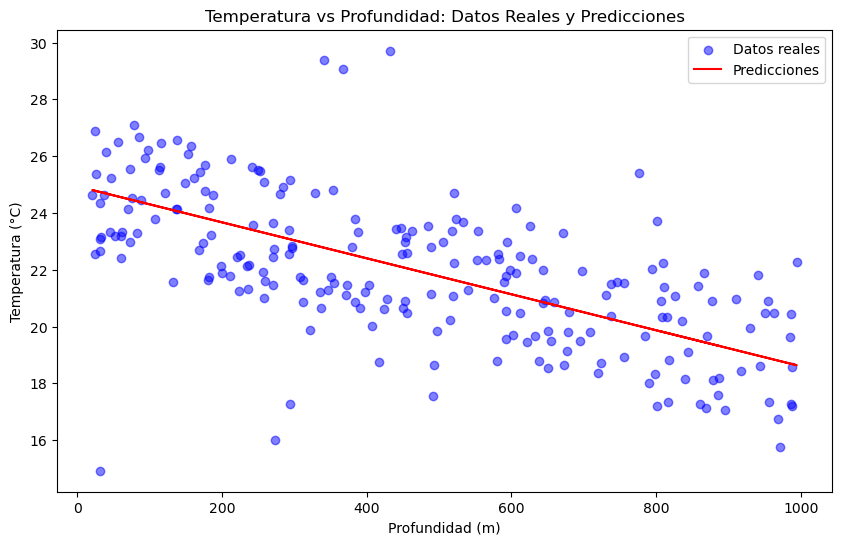

In [19]:


# Ahora intentemos graficar
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', alpha=0.5, label='Datos reales')
plt.plot(x_test.values, y_pred, color='red', label='Predicciones')
plt.xlabel('Profundidad (m)')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura vs Profundidad: Datos Reales y Predicciones')
plt.legend()
plt.show()




## 6. Validación del Modelo
- Evalúa el rendimiento del modelo con datos de prueba
- Utiliza técnicas como validación cruzada para robustecer la evaluación
- Ajusta hiperparámetros si es necesario

Ejemplo:

### 6.2 ¿Qué hace la validación cruzada de 5 pliegues?

Divide tus datos en 5 partes iguales (o casi iguales).
Realiza 5 iteraciones:

En cada iteración, usa 4 partes para entrenar el modelo y 1 parte para probarlo.
Cada parte sirve como conjunto de prueba exactamente una vez.


Calcula una métrica de rendimiento (por defecto, la precisión para clasificación o R² para regresión) para cada iteración.

### 6.1 Validación Cruzada 

**cross_val_score(model, x, y, cv=5)**
Esta línea de código realiza una validación cruzada de 5 pliegues (5-fold cross-validation) en un modelo de aprendizaje automático. Vamos a desglosar cada componente:

cross_val_score: Esta es una función de scikit-learn que realiza la validación cruzada.
- **model:** Es el modelo de aprendizaje automático que estás evaluando (por ejemplo, una regresión lineal, un árbol de decisión, etc.).
- **x:** Son tus datos de entrada (features o características).
- **y:** Son tus datos objetivo (las etiquetas o valores que estás tratando de predecir).
- **cv=5:** Especifica que se debe realizar una validación cruzada de 5 pliegues.
- **cv_scores:** Es el resultado de la función, un array con las puntuaciones de cada pliegue.

In [20]:
from sklearn.model_selection import cross_val_score

# Validación cruzada de 5 pliegues
cv_scores = cross_val_score(model, x, y, cv=5)
print(f"Puntuaciones de validación cruzada: {cv_scores}")
print(f"Media de puntuaciones: {cv_scores.mean()}")

Puntuaciones de validación cruzada: [0.43926811 0.47869994 0.50692766 0.42465429 0.49017993]
Media de puntuaciones: 0.4679459861733779


## 7. Despliegue
- Presenta resultados y conclusiones de manera clara y concisa
- Visualiza predicciones y comparaciones con datos reales
- Proporciona recomendaciones basadas en los hallazgos


Ejemplo:

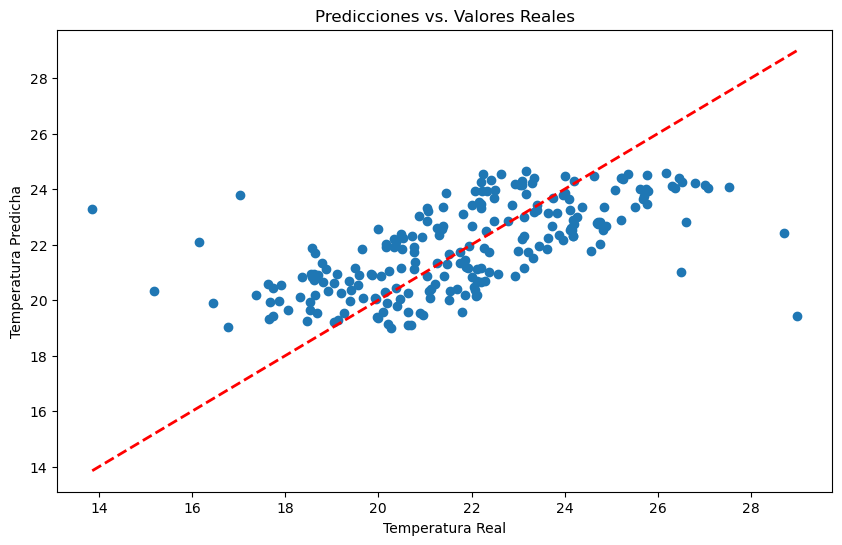




Recomendaciones:




In [106]:
# Visualizar predicciones vs. reales
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Temperatura Real')
plt.ylabel('Temperatura Predicha')
plt.title('Predicciones vs. Valores Reales')
plt.show()

# Conclusiones y recomendaciones
conclusiones = """


Recomendaciones:

"""
print(conclusiones)